In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Models of random graphs

## Erdos-Renyi model

In [3]:
def get_erdos_renyi_graph(n, edge_density, weights):
  # n points
  lst = []
  for i in range(1, n+1):
    for j in range(1, i):
      if np.random.rand() < edge_density:
        # there is an edge between i and j, and the weight (distance)
        lst.append([i,j, np.random.choice(weights)])
  return lst

## Geometric model

In [4]:
def get_geometric_graph(n, treshold, edge_density):
  # n points
  lst = []
  for i in range(1, n+1):
    for j in range(1, i):
      w = np.random.randint(int(treshold/edge_density))
      if w < treshold:
        # there is an edge between i and j, and the weight (distance)
        lst.append([i,j,w])
  return lst

## Barabasi-Albert model

In [5]:
def get_barabasi_albert_graph(n, weights):
  # m - first placed nodes
  m = 2
  # the m points are randomly placed in the 3 dim space
  points = np.random.rand(m, 3)
  lst = [[1, 2, np.random.choice(weights)]]
  # 1 and 2 nodes
  degrees = np.array([1,1]) 
  # probabilities to have a connection with a new node
  probs = degrees/np.sum(degrees)
  # 1,2 - are exist in the space
  for i in range(3, n+1):
    points = np.append(points, [np.random.rand(3)], axis = 0)
    degrees = np.append(degrees, 0)
    # let us select m = 2 nodes to connect
    nodes_to_connect = np.random.choice(range(1, i),size=2,replace=False, p=probs)
    for j in nodes_to_connect:
      # there is an edge between j, i
      lst.append([j, i, np.random.choice(weights)])
      degrees[j - 1] += 1
      degrees[i - 1] += 1
    # recalculate probs
    probs = degrees/np.sum(degrees)
  
  return lst

## Chung Lu model

In [6]:
def get_chung_lu_graph(w, weights):
  n = len(w)
  sum_w = np.sum(np.array(w))
  # n points
  lst = []
  for i in range(1, n+1):
    for j in range(1, i):
      weight = np.random.choice(weights)
      if np.random.rand() < w[i - 1]*w[j - 1]/sum_w:
        # there is an edge between i and j, and the weight (distance)
        lst.append([i,j,weight])
  return lst

## Geometric Chung Lu model

In [7]:
def get_geometric_chung_lu_graph(w, weights):
  # w - the vector of nodes expected degrees
  # f - function (list opairs {x, y}) of the probability that two vertices 
  # are adjacent with the condition that they are within a certain distance (x) from each other
  n = len(w)
  sum_w = np.sum(np.array(w))
  # n points
  lst = []
  for i in range(1, n+1):
    for j in range(1, i):
      weight = np.random.choice(weights)
      if np.random.rand() < (w[i - 1] * w[j - 1]/sum_w) / weight:
        # there is an edge between i and j, and the weight (distance)
        lst.append([i,j,weight])
  return lst

# Parameters

## Edge density

In [8]:
def calculate_edge_density(G):
  # G - nx Graph
  return 2*len(G.edges()) / (len(G.nodes)*(len(G.nodes)-1))

## Number of connected components

In [9]:
from networkx.algorithms.components.connected import connected_components

In [10]:
def calculate_number_of_connected_components(G):
  comp_vector = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
  return len(comp_vector)

## Degrees vector

In [11]:
def calculate_degrees_vector(G):
  return [G.degree(n) for n in G.nodes()]

## Triangles

In [12]:
def calculate_triangles_amount(G):
  return sum(nx.triangles(G).values()) / 3

## Clustering coeff

In [13]:
def calculate_clustering_coeff(G):
  return sum(nx.clustering(G).values())/len(G.nodes())

## Page Ranks

In [14]:
def calculate_page_rank_vector(G, iter_num):
  n = len(G.nodes())


  # adjacency matrix
  A = nx.adjacency_matrix(G).todense()
  indexes = np.nonzero(A)
  A[indexes[0], indexes[1]] = 1
  A = np.array(A)


  # P matrix
  P = np.zeros((n, n))

  for i in range(0,n):
    for j in range(0,n):
        P[j][i] = A[i][j]/A[i].sum()

  # Q matrix 
  # (np.zeros((n,n)) + 1) - matrix with 1 elements
  Q = 0.85*P + 0.15/n * (np.zeros((n,n)) + 1)

  # approximation
  x = np.zeros(n) + 1/n
  for i in range(iter_num):
    x = Q @ x
  return x

## Eigenvalues

In [15]:
def calculate_eigenvalues_of_adj_matrix(G):
  n = len(G.nodes())

  # adjacency matrix
  A = nx.adjacency_matrix(G).todense()
  A = np.array(A)
  return np.linalg.eig(A)[0]

## Weights vector

In [16]:
def calculate_vector_of_weights(G):
  return list(nx.get_edge_attributes(G,'weight').values())

# Reference Graph 1 (simple exmple - c.elegans connectome)

In [ ]:
celegans = pd.read_csv('optic_edges2.txt', delimiter=' ', names = ['from', 'to', 'str','weight'])
celegans = celegans[celegans['from'] != celegans['to']] # без петель
celegans = celegans.drop('str', 1) # удалим столбец
celegans

,from,to,weight
0,I1L,I6,1
1,I1L,pm4D,1
2,I1R,I3,1
3,I1R,M1,1
4,I1R,M2L,1
...,...,...,...
5301,AIYR,AIZR,152
5302,AIYL,AIZL,157
5303,PCAR,PVX,160
5304,AIYL,RIAL,171


In [ ]:
G_ref=nx.Graph()
G_ref.add_weighted_edges_from(celegans.values)

# Reference Graph Medulla

In [17]:
optic_graph = pd.read_csv('optic_edges2.txt', delimiter=' ', names = ['from', 'to', 'region','weight'])
#medulla = optic_graph[optic_graph['region'] == 'ME(R)'] # только medulla
optic_graph = optic_graph[optic_graph['from'] != optic_graph['to']] # без петель
optic_graph = optic_graph.drop('region', 1) # удалим столбец
optic_graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,from,to,weight
0,264083994,390356988,1
1,264083994,1096859621,1
2,264083994,5813021485,1
3,264083994,5813057153,1
4,297572076,575063620,1
...,...,...,...
101178,2124762952,1936507376,377
101179,2124762952,1748929680,401
101180,5813061218,1343403608,562
101181,1873086710,1343403608,692


In [18]:
G_ref=nx.Graph()
G_ref.add_weighted_edges_from(optic_graph.values)

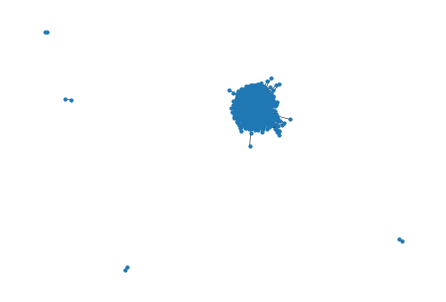

In [19]:
nx.draw(G_ref, pos=nx.spring_layout(G_ref), node_size=10, width=0.5)

# Experement

In [20]:
def estimate_numeric_parameters(G_ref, model, weights):
  
  
  # generate a graph
  points, edges = None, None
  #weights = calculate_vector_of_weights(G_ref)

  if model == 'Erdos-Renyi':
    edges = get_erdos_renyi_graph(len(G_ref.nodes), calculate_edge_density(G_ref), weights)

  elif model == 'Geometric':
    edges = get_geometric_graph(len(G_ref.nodes), np.max(list(nx.get_edge_attributes(G_ref,'weight').values())), calculate_edge_density(G_ref))
    
  elif model == 'Barabasi-Albert':
    edges = get_barabasi_albert_graph(len(G_ref.nodes), weights)

  elif model == 'Chung Lu':
    edges = get_chung_lu_graph(calculate_degrees_vector(G_ref), weights)
    
  elif model == 'Geometric Chung Lu':
    edges = get_geometric_chung_lu_graph(calculate_degrees_vector(G_ref), weights)

  else:
    print('Nonexistent model name')
    return 


  G=nx.Graph()
  G.add_weighted_edges_from(edges)
  print('\n\n' + model + ' graph was generated ')


  ## Edge density
  edge_density_G = calculate_edge_density(G)
  #edge_density_G_ref = calculate_edge_density(G_ref)
  #print(f'Edge density. G: {edge_density_G}, G_ref: {edge_density_G_ref}')
  print(f'Edge density. G: {edge_density_G}')
  
  ## Number of connected components
  comp_G = calculate_number_of_connected_components(G)
  #comp_G_ref = calculate_number_of_connected_components(G_ref)
  #print(f'Number of connected components. G: {comp_G}, G_ref: {comp_G_ref}')
  print(f'Number of connected components. G: {comp_G}')

  
  ## Triangles amount
  triangles_G = calculate_triangles_amount(G)
  #triangles_G_ref = calculate_triangles_amount(G_ref)
  #print(f'Triangles amount. G: {triangles_G}, G_ref: {triangles_G_ref}')
  print(f'Triangles amount. G: {triangles_G}')


  ## Clustering coeff
  clustering_coeff_G = calculate_clustering_coeff(G)
  #clustering_coeff_G_ref = calculate_clustering_coeff(G_ref)
  #print(f'Clustering coeff. G: {clustering_coeff_G}, G_ref: {clustering_coeff_G_ref}')
  print(f'Clustering coeff. G: {clustering_coeff_G}')

  

  return np.array([edge_density_G, comp_G, triangles_G, clustering_coeff_G])

In [38]:
def draw_hist(v_rand, model_name, bins_n=None):
  if bins_n is None:
     bins_n=len(v_rand)
  plt.hist(v_rand, bins=bins_n)
  plt.title(model_name)

In [22]:
def estimate_vector_parameters(G_ref, model, vector_name, weights):
  
  # generate a graph
  points, edges = None, None
  #weights = calculate_vector_of_weights(G_ref)

  if model == 'Erdos-Renyi':
    edges = get_erdos_renyi_graph(len(G_ref.nodes), calculate_edge_density(G_ref), weights)

  elif model == 'Geometric':
    edges = get_geometric_graph(len(G_ref.nodes), np.max(list(nx.get_edge_attributes(G_ref,'weight').values())), calculate_edge_density(G_ref))
    
  elif model == 'Barabasi-Albert':
    edges = get_barabasi_albert_graph(len(G_ref.nodes), weights)

  elif model == 'Chung Lu':
    edges = get_chung_lu_graph(calculate_degrees_vector(G_ref), weights)
    
  elif model == 'Geometric Chung Lu':
    edges = get_geometric_chung_lu_graph(calculate_degrees_vector(G_ref), weights)

  else:
    print('Nonexistent model name')
    return 


  G=nx.Graph()
  G.add_weighted_edges_from(edges)
  print('\n\n' + model + ' graph was generated ')
  

  if vector_name=='PageRank':
    ## PageRank vector
    page_rank_G = calculate_page_rank_vector(G, 100)
    #page_rank_G_ref = calculate_page_rank_vector(G_ref, 100)
    #print(f'PageRank. G: {page_rank_G}, G_ref: {page_rank_G_ref}')
    return page_rank_G

  if vector_name=='Eigenvalues':
    ## Eigenvalues
    eigenvalues_G = calculate_eigenvalues_of_adj_matrix(G)
    #eigenvalues_G_ref = calculate_eigenvalues_of_adj_matrix(G_ref)
    #print(f'Eigenvalues. G: {eigenvalues_G}, G_ref: {eigenvalues_G_ref}')
    return eigenvalues_G

  if vector_name=='Weights':
    ## Vector of weights
    weights_G = calculate_vector_of_weights(G)
    #weights_G_ref = calculate_vector_of_weights(G_ref)
    #print(f'Vector of weights. G: {weights_G}, G_ref: {weights_G_ref}')
    return weights_G

  if vector_name=='Degrees':
    ## Degrees vector
    degrees_G = calculate_degrees_vector(G)
    #degrees_G_ref = calculate_degrees_vector(G_ref)
    #print(f'Degrees vector. G: {degrees_G}, G_ref: {degrees_G_ref}')
    return degrees_G

In [23]:
min = optic_graph['weight'].min()
max = optic_graph['weight'].max()
print(min, max)

1 793


## Numeric parameters

In [ ]:
estimate_numeric_parameters(G_ref, 'Erdos-Renyi', optic_graph['weight'])
estimate_numeric_parameters(G_ref, 'Geometric', optic_graph['weight'])
estimate_numeric_parameters(G_ref, 'Barabasi-Albert', optic_graph['weight'])
estimate_numeric_parameters(G_ref, 'Chung Lu', optic_graph['weight'])
estimate_numeric_parameters(G_ref, 'Geometric Chung Lu', optic_graph['weight'])



Erdos-Renyi graph was generated 
Edge density. G: 0.012786541766406045
Number of connected components. G: 1
Triangles amount. G: 18219.0
Clustering coeff. G: 0.01279030277455616


Geometric graph was generated 
Edge density. G: 0.012827633030102715
Number of connected components. G: 1
Triangles amount. G: 18190.0
Clustering coeff. G: 0.01270662242726237


Barabasi-Albert graph was generated 
Edge density. G: 0.0010699477825965756
Number of connected components. G: 1
Triangles amount. G: 103.0
Clustering coeff. G: 0.010356578180659135


Chung Lu graph was generated 
Edge density. G: 0.013649157706796271
Number of connected components. G: 2
Triangles amount. G: 459971.0
Clustering coeff. G: 0.11861476234735119


Geometric Chung Lu graph was generated 
Edge density. G: 0.010646562599535834
Number of connected components. G: 1
Triangles amount. G: 208594.0
Clustering coeff. G: 0.09005921900803854


array([1.06465626e-02, 1.00000000e+00, 2.08594000e+05, 9.00592190e-02])

In [ ]:
estimations = [estimate_numeric_parameters(G_ref, 'Erdos-Renyi', optic_graph['weight'])]
print(estimations)
print(np.array(estimations).mean(axis = 0), np.var(np.array(estimations), axis = 0)) # или axis = 0?



Erdos-Renyi graph was generated 
Edge density. G: 0.012771937902653222
Number of connected components. G: 1
Triangles amount. G: 17955.0
Clustering coeff. G: 0.012639301554129415
[array([1.27719379e-02, 1.00000000e+00, 1.79550000e+04, 1.26393016e-02])]
[1.27719379e-02 1.00000000e+00 1.79550000e+04 1.26393016e-02] [0. 0. 0. 0.]


In [27]:
# 100 experements
def experements_numeric(amount, G_ref, model):
  estimations = []
  for i in range(amount):
    current = estimate_numeric_parameters(G_ref, model, optic_graph['weight'])
    estimations.append(current)
  return np.array(estimations).mean(axis = 0), np.var(np.array(estimations), axis = 0) 

In [ ]:
erdos_renyi_estimations, erdos_renyi_estimations_var = experements_numeric(50, G_ref, 'Erdos-Renyi')



Erdos-Renyi graph was generated 
Edge density. G: 0.012776519506967832
Number of connected components. G: 1
Triangles amount. G: 18350.0
Clustering coeff. G: 0.012941065207437423


Erdos-Renyi graph was generated 
Edge density. G: 0.012797566251788078
Number of connected components. G: 1
Triangles amount. G: 18245.0
Clustering coeff. G: 0.012799909246562186


Erdos-Renyi graph was generated 
Edge density. G: 0.012743732401091395
Number of connected components. G: 1
Triangles amount. G: 17910.0
Clustering coeff. G: 0.012688654392382008


Erdos-Renyi graph was generated 
Edge density. G: 0.012748314005406007
Number of connected components. G: 1
Triangles amount. G: 17921.0
Clustering coeff. G: 0.012660667422021713


Erdos-Renyi graph was generated 
Edge density. G: 0.012742873350282406
Number of connected components. G: 1
Triangles amount. G: 17959.0
Clustering coeff. G: 0.012713267055281696


Erdos-Renyi graph was generated 
Edge density. G: 0.012800000229080215
Number of connected co

In [ ]:
print(erdos_renyi_estimations, erdos_renyi_estimations_var)

[1.27747699e-02 1.00000000e+00 1.81414800e+04 1.27760211e-02] [1.63975840e-09 0.00000000e+00 5.08903696e+04 1.00839500e-08]


In [23]:
geometric_estimations, geometric_estimations_var = experements_numeric(50, G_ref, 'Geometric')



Geometric graph was generated 
Edge density. G: 0.01267901724014751
Number of connected components. G: 1
Triangles amount. G: 17926.0
Clustering coeff. G: 0.012809230948890938


Geometric graph was generated 
Edge density. G: 0.012744018751361058
Number of connected components. G: 1
Triangles amount. G: 17879.0
Clustering coeff. G: 0.012648980648528596


Geometric graph was generated 
Edge density. G: 0.012790407495046499
Number of connected components. G: 1
Triangles amount. G: 18429.0
Clustering coeff. G: 0.012923621410424099


Geometric graph was generated 
Edge density. G: 0.012775517281024011
Number of connected components. G: 1
Triangles amount. G: 18014.0
Clustering coeff. G: 0.012735592502468187


Geometric graph was generated 
Edge density. G: 0.012789262093967845
Number of connected components. G: 1
Triangles amount. G: 17911.0
Clustering coeff. G: 0.01258916598491301


Geometric graph was generated 
Edge density. G: 0.012719392628170022
Number of connected components. G: 1

In [24]:
print(geometric_estimations, geometric_estimations_var)

[1.27635851e-02 1.00000000e+00 1.80744400e+04 1.27562841e-02] [1.71462391e-09 0.00000000e+00 4.56870064e+04 9.81836938e-09]


In [25]:
barabasi_albert_estimations, barabasi_albert_estimations_var = experements_numeric(50, G_ref, 'Barabasi-Albert')



Barabasi-Albert graph was generated 
Edge density. G: 0.0010699477825965756
Number of connected components. G: 1
Triangles amount. G: 103.0
Clustering coeff. G: 0.008926121317588069


Barabasi-Albert graph was generated 
Edge density. G: 0.0010699477825965756
Number of connected components. G: 1
Triangles amount. G: 92.0
Clustering coeff. G: 0.008187518818368749


Barabasi-Albert graph was generated 
Edge density. G: 0.0010699477825965756
Number of connected components. G: 1
Triangles amount. G: 96.0
Clustering coeff. G: 0.011306965344471299


Barabasi-Albert graph was generated 
Edge density. G: 0.0010699477825965756
Number of connected components. G: 1
Triangles amount. G: 118.0
Clustering coeff. G: 0.010915355974301065


Barabasi-Albert graph was generated 
Edge density. G: 0.0010699477825965756
Number of connected components. G: 1
Triangles amount. G: 105.0
Clustering coeff. G: 0.01240176854286707


Barabasi-Albert graph was generated 
Edge density. G: 0.0010699477825965756
Numbe

In [26]:
print(barabasi_albert_estimations, barabasi_albert_estimations_var)

[1.06994778e-03 1.00000000e+00 1.03480000e+02 1.01911514e-02] [1.17549435e-36 0.00000000e+00 2.47569600e+02 3.56976032e-06]


In [27]:
chung_lu_estimations, chung_lu_estimations_var = experements_numeric(50, G_ref, 'Chung Lu')



Chung Lu graph was generated 
Edge density. G: 0.0134032123011342
Number of connected components. G: 1
Triangles amount. G: 450706.0
Clustering coeff. G: 0.11791016282828255


Chung Lu graph was generated 
Edge density. G: 0.013419785285265365
Number of connected components. G: 1
Triangles amount. G: 461433.0
Clustering coeff. G: 0.11780247397027127


Chung Lu graph was generated 
Edge density. G: 0.013448560499602533
Number of connected components. G: 2
Triangles amount. G: 451884.0
Clustering coeff. G: 0.11540546170685788


Chung Lu graph was generated 
Edge density. G: 0.013399362076684254
Number of connected components. G: 1
Triangles amount. G: 455073.0
Clustering coeff. G: 0.11428562380757266


Chung Lu graph was generated 
Edge density. G: 0.013438075044934366
Number of connected components. G: 1
Triangles amount. G: 458660.0
Clustering coeff. G: 0.11906890126513622


Chung Lu graph was generated 
Edge density. G: 0.013441076419417518
Number of connected components. G: 2
Trian

In [28]:
print(chung_lu_estimations, chung_lu_estimations_var)

[1.34767017e-02 1.08000000e+00 4.55232340e+05 1.18067743e-01] [5.51604126e-09 7.36000000e-02 1.39212778e+07 3.44435020e-06]


In [28]:
geom_chung_lu_estimations, geom_chung_lu_estimations_var = experements_numeric(50, G_ref, 'Geometric Chung Lu')



Geometric Chung Lu graph was generated 
Edge density. G: 0.010499299131582065
Number of connected components. G: 1
Triangles amount. G: 208621.0
Clustering coeff. G: 0.0907266517610574


Geometric Chung Lu graph was generated 
Edge density. G: 0.010598771820617352
Number of connected components. G: 1
Triangles amount. G: 207423.0
Clustering coeff. G: 0.08962188260170799


Geometric Chung Lu graph was generated 
Edge density. G: 0.010564728851029959
Number of connected components. G: 1
Triangles amount. G: 203117.0
Clustering coeff. G: 0.0922871376413497


Geometric Chung Lu graph was generated 
Edge density. G: 0.010440419412259622
Number of connected components. G: 2
Triangles amount. G: 205687.0
Clustering coeff. G: 0.08863739274592906


Geometric Chung Lu graph was generated 
Edge density. G: 0.010643344043416294
Number of connected components. G: 1
Triangles amount. G: 206358.0
Clustering coeff. G: 0.08875804049856242


Geometric Chung Lu graph was generated 
Edge density. G: 0.0

In [29]:
print(geom_chung_lu_estimations, geom_chung_lu_estimations_var)

[1.05208750e-02 1.20000000e+00 2.06927480e+05 9.01002196e-02] [3.88379287e-09 2.00000000e-01 8.48082493e+06 2.27321559e-06]


Reference graph

In [58]:
print('Optic lobe graph: ')
print(calculate_edge_density(G_ref), calculate_number_of_connected_components(G_ref), 
      calculate_triangles_amount(G_ref), calculate_clustering_coeff(G_ref))

Optic lobe graph: 
0.012760340716731862 5 673729.0 0.2945832540407661


## Vectors and distributions

Erdos-Renyi

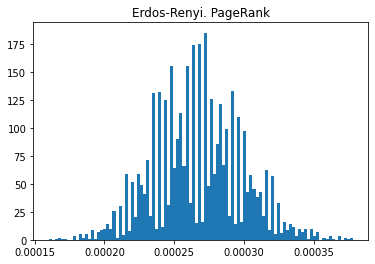

In [59]:
erdos_renyi_pagerank = estimate_vector_parameters(G_ref, 'Erdos-Renyi', 'PageRank', optic_graph['weight'])
draw_hist(erdos_renyi_pagerank, 'Erdos-Renyi. PageRank', 100)



Erdos-Renyi graph was generated 


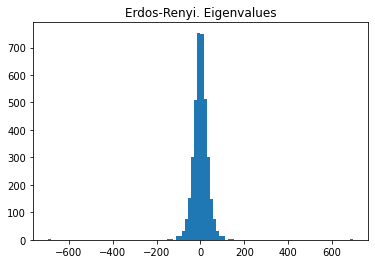

In [60]:
erdos_renyi_eigenvalues = estimate_vector_parameters(G_ref, 'Erdos-Renyi', 'Eigenvalues', optic_graph['weight'])
draw_hist(erdos_renyi_eigenvalues, 'Erdos-Renyi. Eigenvalues', 100)



Erdos-Renyi graph was generated 


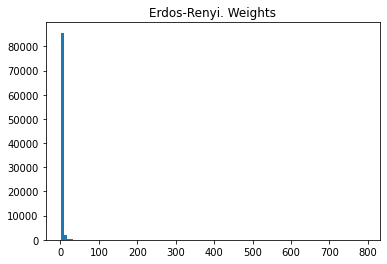

In [61]:
erdos_renyi_weights = estimate_vector_parameters(G_ref, 'Erdos-Renyi', 'Weights', optic_graph['weight'])
draw_hist(erdos_renyi_weights, 'Erdos-Renyi. Weights', 100)



Erdos-Renyi graph was generated 


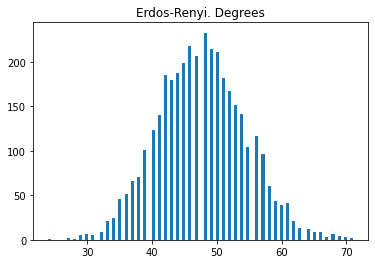

In [62]:
erdos_renyi_degrees = estimate_vector_parameters(G_ref, 'Erdos-Renyi', 'Degrees', optic_graph['weight'])
draw_hist(erdos_renyi_degrees, 'Erdos-Renyi. Degrees', 100)

Geometric



Geometric graph was generated 


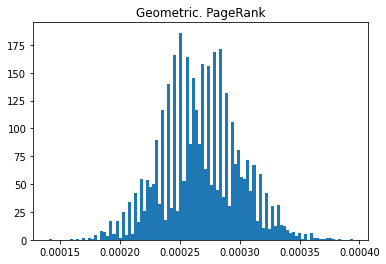

In [63]:
geometric_pagerank = estimate_vector_parameters(G_ref, 'Geometric', 'PageRank', optic_graph['weight'])
draw_hist(geometric_pagerank, 'Geometric. PageRank', 100)



Geometric graph was generated 


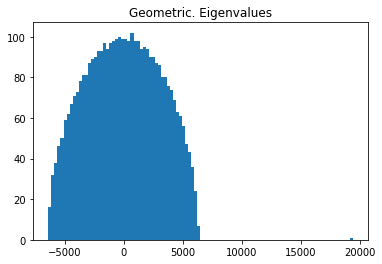

In [64]:
geometric_eigenvalues = estimate_vector_parameters(G_ref, 'Geometric', 'Eigenvalues', optic_graph['weight'])
draw_hist(geometric_eigenvalues, 'Geometric. Eigenvalues', 100)



Geometric graph was generated 


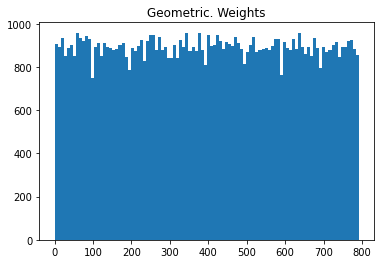

In [65]:
geometric_weights = estimate_vector_parameters(G_ref, 'Geometric', 'Weights', optic_graph['weight'])
draw_hist(geometric_weights, 'Geometric. Weights', 100)



Geometric graph was generated 


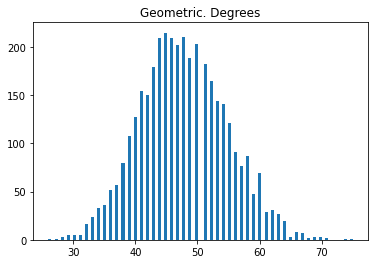

In [66]:
geometric_degrees = estimate_vector_parameters(G_ref, 'Geometric', 'Degrees', optic_graph['weight'])
draw_hist(geometric_degrees, 'Geometric. Degrees', 100)

Barabasi-Albert



Barabasi-Albert graph was generated 


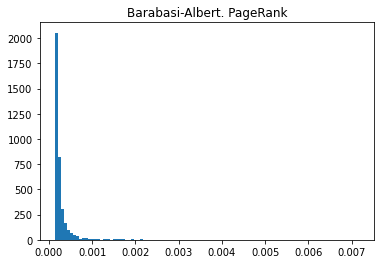

In [68]:
barabasi_albert_pagerank = estimate_vector_parameters(G_ref, 'Barabasi-Albert', 'PageRank', optic_graph['weight'])
draw_hist(barabasi_albert_pagerank, 'Barabasi-Albert. PageRank', 100)



Barabasi-Albert graph was generated 


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


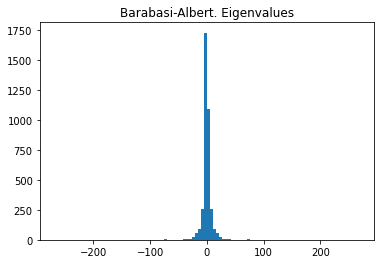

In [69]:
barabasi_albert_eigenvalues = estimate_vector_parameters(G_ref, 'Barabasi-Albert', 'Eigenvalues', optic_graph['weight'])
draw_hist(barabasi_albert_eigenvalues, 'Barabasi-Albert. Eigenvalues', 100)



Barabasi-Albert graph was generated 


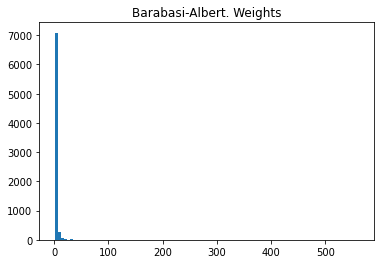

In [70]:
barabasi_albert_weights = estimate_vector_parameters(G_ref, 'Barabasi-Albert', 'Weights', optic_graph['weight'])
draw_hist(barabasi_albert_weights, 'Barabasi-Albert. Weights', 100)



Barabasi-Albert graph was generated 


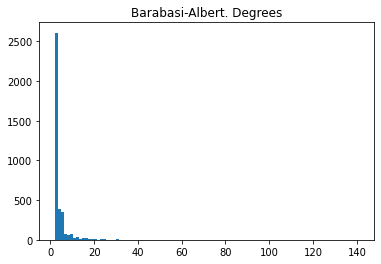

In [71]:
barabasi_albert_degrees = estimate_vector_parameters(G_ref, 'Barabasi-Albert', 'Degrees', optic_graph['weight'])
draw_hist(barabasi_albert_degrees, 'Barabasi-Albert. Degrees', 100)

Chung Lu



Chung Lu graph was generated 


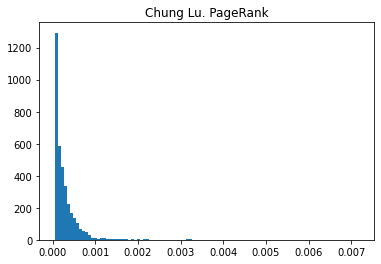

In [72]:
chung_lu_pagerank = estimate_vector_parameters(G_ref, 'Chung Lu', 'PageRank', optic_graph['weight'])
draw_hist(chung_lu_pagerank, 'Chung Lu. PageRank', 100)



Chung Lu graph was generated 


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


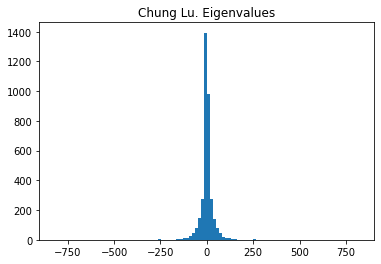

In [73]:
chung_lu_eigenvalues = estimate_vector_parameters(G_ref, 'Chung Lu', 'Eigenvalues', optic_graph['weight'])
draw_hist(chung_lu_eigenvalues, 'Chung Lu. Eigenvalues', 100)



Chung Lu graph was generated 


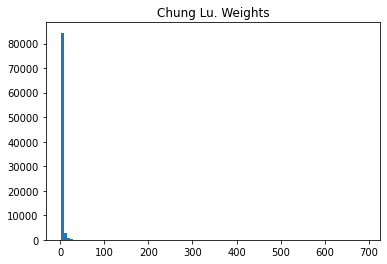

In [74]:
chung_lu_weights = estimate_vector_parameters(G_ref, 'Chung Lu', 'Weights', optic_graph['weight'])
draw_hist(chung_lu_weights, 'Chung Lu. Weights', 100)



Chung Lu graph was generated 


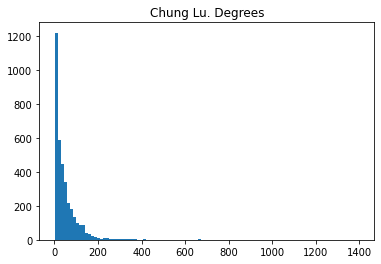

In [75]:
chung_lu_degrees = estimate_vector_parameters(G_ref, 'Chung Lu', 'Degrees', optic_graph['weight'])
draw_hist(chung_lu_degrees, 'Chung Lu. Degrees', 100)

Geometric Chung Lu



Geometric Chung Lu graph was generated 


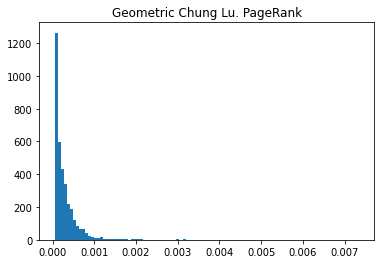

In [76]:
geom_chung_lu_pagerank = estimate_vector_parameters(G_ref, 'Geometric Chung Lu', 'PageRank', optic_graph['weight'])
draw_hist(geom_chung_lu_pagerank, 'Geometric Chung Lu. PageRank', 100)



Geometric Chung Lu graph was generated 


/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


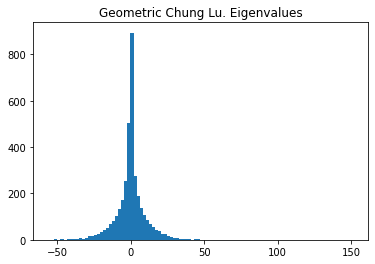

In [77]:
geom_chung_lu_eigenvalues = estimate_vector_parameters(G_ref, 'Geometric Chung Lu', 'Eigenvalues', optic_graph['weight'])
draw_hist(geom_chung_lu_eigenvalues, 'Geometric Chung Lu. Eigenvalues', 100)



Geometric Chung Lu graph was generated 


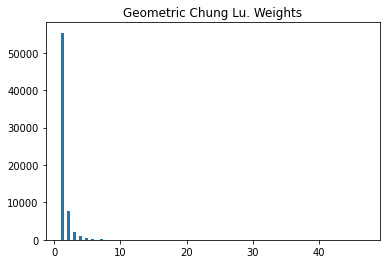

In [78]:
geom_chung_lu_weights = estimate_vector_parameters(G_ref, 'Geometric Chung Lu', 'Weights', optic_graph['weight'])
draw_hist(geom_chung_lu_weights, 'Geometric Chung Lu. Weights', 100)



Geometric Chung Lu graph was generated 


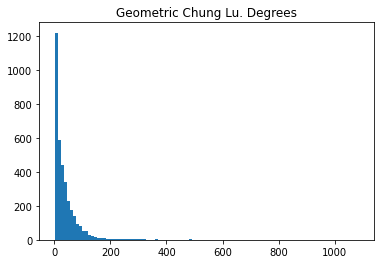

In [79]:
geom_chung_lu_degrees = estimate_vector_parameters(G_ref, 'Geometric Chung Lu', 'Degrees', optic_graph['weight'])
draw_hist(geom_chung_lu_degrees, 'Geometric Chung Lu. Degrees', 100)

# Saving graphs 

In [80]:
def get_edges(G_ref, model, weights):
  
  # generate a graph
  points, edges = None, None
  #weights = calculate_vector_of_weights(G_ref)

  if model == 'Erdos-Renyi':
    edges = get_erdos_renyi_graph(len(G_ref.nodes), calculate_edge_density(G_ref), weights)
    
  elif model == 'Geometric':
    edges = get_geometric_graph(len(G_ref.nodes), np.max(list(nx.get_edge_attributes(G_ref,'weight').values())), calculate_edge_density(G_ref))
    
  elif model == 'Barabasi-Albert':
    edges = get_barabasi_albert_graph(len(G_ref.nodes), weights)

  elif model == 'Chung Lu':
    edges = get_chung_lu_graph(calculate_degrees_vector(G_ref), weights)
    
  elif model == 'Geometric Chung Lu':
    edges = get_geometric_chung_lu_graph(calculate_degrees_vector(G_ref), weights)

  else:
    print('Nonexistent model name')
    return 
  
  return edges

In [81]:
np.savetxt(r'erdos_renyi_edges.txt', get_edges(G_ref, 'Erdos-Renyi', optic_graph['weight']), fmt='%s')

In [85]:
np.savetxt(r'geometric_edges.txt', get_edges(G_ref, 'Geometric', optic_graph['weight']), fmt='%s')

In [86]:
np.savetxt(r'barabasi_albert_edges.txt', get_edges(G_ref, 'Barabasi-Albert', optic_graph['weight']), fmt='%s')

In [87]:
np.savetxt(r'chung_lu_edges.txt', get_edges(G_ref, 'Chung Lu', optic_graph['weight']), fmt='%s')

In [88]:
np.savetxt(r'geom_chung_lu_edges.txt', get_edges(G_ref, 'Geometric Chung Lu', optic_graph['weight']), fmt='%s')